## Goal

The goal of this notebook is to build a simple linear network, apply basic optimization and play with autograd tools. I used Auto MPG dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/). 


## Loading Data

Importing the libraries I'm are going to use. TensorFlow for DL models, matplotlib for plotting data/results, numpy and pandas for data handling. 

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print("TF version:", tf.__version__)

import matplotlib.pyplot as plt   
import numpy as np
import pandas as pd
import seaborn as sns


TF version: 2.9.2


### Auto-MPG Dataset

<img src="https://archive.ics.uci.edu/ml/assets/MLimages/Large9.jpg" width=350 />


|  |  |  |  |  |  |
|---|---|---|---|---|---|
| Data Set Characteristics:&nbsp;&nbsp; | Multivariate | Number of Instances: | 398 | Area: | N/A |
| Attribute Characteristics: | Categorical, Real | Number of Attributes: | 8 | Date Donated | 1993-07-07 |
| Associated Tasks: | Regression | Missing Values? | Yes | Number of Web Hits: | 821244 |



The dataset contains the following attributes: 

1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)




In [ ]:

data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

# Feature names
colnames = ["mpg", "cylinders", "displacement", "horsepower", "weight", 
            "acceleration", "model year", "origin", "car name"]

dfauto = pd.read_csv(data_url, delim_whitespace = True, header=None,na_values='?',names=colnames)






# display the dfdauto
display(dfauto)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


#Preprocessing
Dropping the "car name" variable since it's an object which has many unique samples and not meaningfull for our findings

In [ ]:

df_data = dfauto.drop(['car name'],axis=1)
df_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


<Add sentences to explain>

In [ ]:
df_data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [ ]:
df_data[df_data['horsepower'].isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,NaN,2046.0,19.0,71,1
126,21.0,6,200.0,NaN,2875.0,17.0,74,1
330,40.9,4,85.0,NaN,1835.0,17.3,80,2
336,23.6,4,140.0,NaN,2905.0,14.3,80,1
354,34.5,4,100.0,NaN,2320.0,15.8,81,2
374,23.0,4,151.0,NaN,3035.0,20.5,82,1


In [ ]:

df_data = df_data.dropna()
df_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [ ]:
df_data['origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

0         USA
1         USA
2         USA
3         USA
4         USA
        ...  
393       USA
394    Europe
395       USA
396       USA
397       USA
Name: origin, Length: 392, dtype: object

In [ ]:
df_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [ ]:
df_data['origin'] = df_data['origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

<ipython-input-90-8f32c3c3bf26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['origin'] = df_data['origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})


Dummy coding 'origin' column

In [ ]:
df_data = pd.get_dummies(df_data,columns=['origin'],prefix='',prefix_sep='')
df_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1


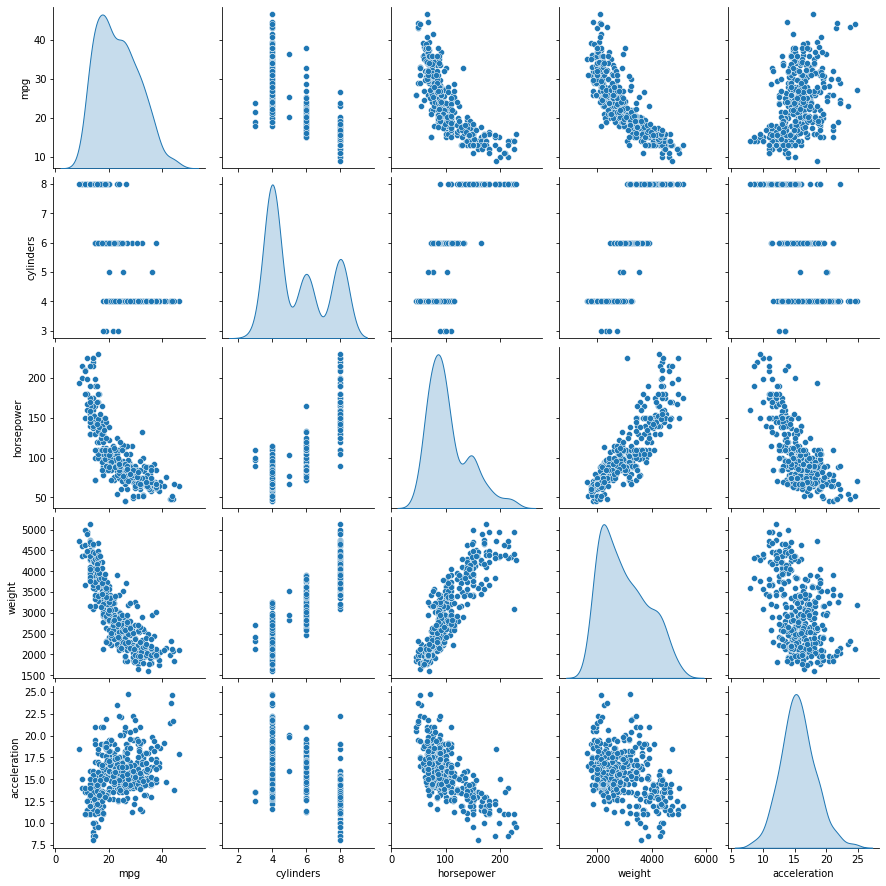

In [ ]:
sns.pairplot(df_data,vars=['mpg','cylinders','horsepower','weight','acceleration'],diag_kind="kde")

## Data Split




In [ ]:
train_data = df_data.sample(frac=0.8, random_state=0)#Splitting the data(80% for training and 20% for testing)
test_data = df_data.drop(train_data.index)

In [ ]:
train_data.shape, test_data.shape

((314, 10), (78, 10))

In [ ]:
x_train = train_data.copy()
x_test = test_data.copy()

y_train = x_train.pop('mpg')
y_test = x_test.pop('mpg')

In [ ]:
display(x_train)
display(x_test)
display(y_train)
display(y_test)

,cylinders,displacement,horsepower,weight,acceleration,model year,Europe,Japan,USA
146,4,90.0,75.0,2125.0,14.5,74,0,0,1
282,4,140.0,88.0,2890.0,17.3,79,0,0,1
69,8,350.0,160.0,4456.0,13.5,72,0,0,1
378,4,105.0,63.0,2125.0,14.7,82,0,0,1
331,4,97.0,67.0,2145.0,18.0,80,0,1,0
...,...,...,...,...,...,...,...,...,...
281,6,200.0,85.0,2990.0,18.2,79,0,0,1
229,8,400.0,180.0,4220.0,11.1,77,0,0,1
150,4,108.0,93.0,2391.0,15.5,74,0,1,0
145,4,83.0,61.0,2003.0,19.0,74,0,1,0


,cylinders,displacement,horsepower,weight,acceleration,model year,Europe,Japan,USA
9,8,390.0,190.0,3850.0,8.5,70,0,0,1
25,8,360.0,215.0,4615.0,14.0,70,0,0,1
28,8,304.0,193.0,4732.0,18.5,70,0,0,1
31,4,113.0,95.0,2228.0,14.0,71,0,1,0
33,6,232.0,100.0,2634.0,13.0,71,0,0,1
...,...,...,...,...,...,...,...,...,...
369,4,112.0,88.0,2395.0,18.0,82,0,0,1
375,4,105.0,74.0,1980.0,15.3,82,1,0,0
382,4,108.0,70.0,2245.0,16.9,82,0,1,0
384,4,91.0,67.0,1965.0,15.7,82,0,1,0


146    28.0
282    22.3
69     12.0
378    38.0
331    33.8
       ... 
281    19.8
229    16.0
150    26.0
145    32.0
182    28.0
Name: mpg, Length: 314, dtype: float64

9      15.0
25     10.0
28      9.0
31     25.0
33     19.0
       ... 
369    34.0
375    36.0
382    34.0
384    32.0
396    28.0
Name: mpg, Length: 78, dtype: float64

## Normalization

Normalizing the variables to make sure each variable contributes equally to the analysis


In [ ]:
df_data.describe().transpose()[['mean','std']] 

,mean,std
mpg,23.445918,7.805007
cylinders,5.471939,1.705783
displacement,194.411990,104.644004
horsepower,104.469388,38.491160
weight,2977.584184,849.402560
acceleration,15.541327,2.758864
model year,75.979592,3.683737
Europe,0.173469,0.379136
Japan,0.201531,0.401656
USA,0.625000,0.484742


Creating a `normalizer` instance using keras `Normalization` object and using `adapt` to learn normalization mean and standard deviations of `x_train`.
   

In [ ]:

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(x_train.to_numpy())

In [ ]:
normalizer.mean.numpy()

array([[5.47770691e+00, 1.95318497e+02, 1.04869446e+02, 2.99025171e+03,
        1.55592356e+01, 7.58980942e+01, 1.78343967e-01, 1.97452217e-01,
        6.24203861e-01]], dtype=float32)

In [ ]:
normalizer.adapt_variance

<tf.Variable 'variance:0' shape=(9,) dtype=float32, numpy=
array([2.8800766e+00, 1.0850413e+04, 1.4466995e+03, 7.0989688e+05,
       7.7550273e+00, 1.3467321e+01, 1.4653738e-01, 1.5846483e-01,
       2.3457341e-01], dtype=float32)>

After applying normalizer we can now notice that both mean and varaince of all variables lies in similar scale

## Linear Networks

Using Sequential to stack layers and build my first AI model.

In [ ]:

linear_model = tf.keras.Sequential()
linear_model.add(normalizer)
linear_model.add(tf.keras.layers.Dense(1))




Compiling the model after defining it and using SGD as optimizer with a learning rate of 0.1 and a loss function of mean_absolute_error

In [ ]:

linear_model.compile(tf.keras.optimizers.SGD(learning_rate=0.1),
              loss='mean_absolute_error')





Training the model for `300 epochs` keeping `verbose` turned off (0), and `validation_split` be 20%.

In [ ]:
history = linear_model.fit(x_train, y_train, epochs=300,verbose=0,validation_split=0.2)







We stored the training output in `history` to observe the learning curve by plotting the training and validation loss. 

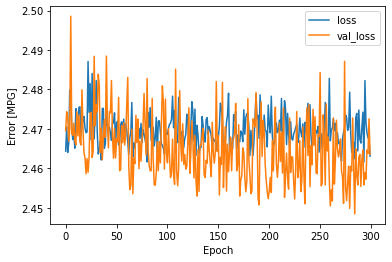

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

#Model evaluation

In [ ]:
linear_model.evaluate(x_test,  y_test)


3/3 [==============================] - 0s 5ms/step - loss: 2.4833


2.483286142349243

## Deeper Network


In [ ]:
deep_model = tf.keras.Sequential()
deep_model.add(normalizer)
deep_model.add(tf.keras.layers.Dense(64,activation='relu')),
deep_model.add(tf.keras.layers.Dense(64,activation='relu')),
deep_model.add(tf.keras.layers.Dense(1))



deep_model.compile(tf.keras.optimizers.SGD(learning_rate=0.1),
              loss='mean_absolute_error')

In [ ]:
history = deep_model.fit(x_train, y_train, epochs=300,verbose=0,validation_split=0.2)

Now let us visualize the learning curve to observe how it learns.

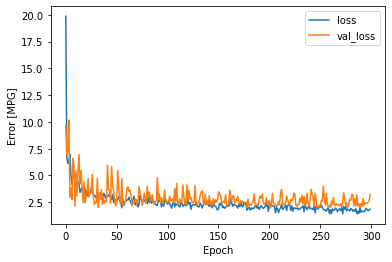

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

In [ ]:
deep_model.evaluate(x_test,  y_test)

3/3 [==============================] - 0s 4ms/step - loss: 2.9454


2.9454290866851807